In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

In [2]:
df = pd.read_csv('titanic.csv')
df

,sex,age,fare,class,who,survived
0,male,22.0,7.2500,Third,man,0
1,female,38.0,71.2833,First,woman,1
2,female,26.0,7.9250,Third,woman,1
3,female,35.0,53.1000,First,woman,1
4,male,35.0,8.0500,Third,man,0
...,...,...,...,...,...,...
886,male,27.0,13.0000,Second,man,0
887,female,19.0,30.0000,First,woman,1
888,female,NaN,23.4500,Third,woman,0
889,male,26.0,30.0000,First,man,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       891 non-null    object 
 1   age       714 non-null    float64
 2   fare      891 non-null    float64
 3   class     891 non-null    object 
 4   who       891 non-null    object 
 5   survived  891 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 41.9+ KB


In [4]:
df.describe()[['age', 'fare']]

,age,fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [5]:
df[df['fare'] < 5].sort_values(by='fare')

,sex,age,fare,class,who,survived
179,male,36.0,0.0000,Third,man,0
263,male,40.0,0.0000,First,man,0
271,male,25.0,0.0000,Third,man,1
277,male,NaN,0.0000,Second,man,0
302,male,19.0,0.0000,Third,man,0
413,male,NaN,0.0000,Second,man,0
466,male,NaN,0.0000,Second,man,0
481,male,NaN,0.0000,Second,man,0
597,male,49.0,0.0000,Third,man,0
633,male,NaN,0.0000,First,man,0


In [6]:
for col in ['sex', 'class', 'who', 'survived']:
    print(f'---------- {col} ----------')
    print(df[col].unique())
    print('----------------------------------------')

---------- sex ----------
['male' 'female']
----------------------------------------
---------- class ----------
['Third' 'First' 'Second']
----------------------------------------
---------- who ----------
['man' 'woman' 'child']
----------------------------------------
---------- survived ----------
[0 1]
----------------------------------------


In [7]:
from datasist.structdata import detect_outliers

<AxesSubplot:xlabel='age'>

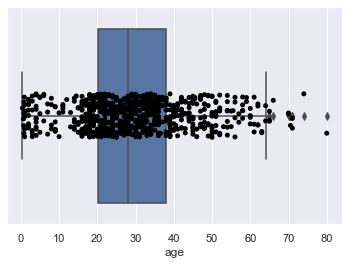

In [8]:
sns.boxplot(x='age', data=df)
sns.stripplot(x='age', data=df, color='black')

<AxesSubplot:xlabel='fare'>

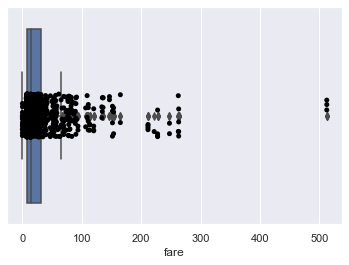

In [9]:
sns.boxplot(x='fare', data=df)
sns.stripplot(x='fare', data=df, color='black')

In [10]:
for col in ['age', 'fare']:
    ind = detect_outliers(df, 0, [col])
    df[col].iloc[ind] = np.nan

C:\Anaconda3\envs\tensorflow\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [11]:
df.isna().sum()

sex           0
age         177
fare        116
class         0
who           0
survived      0
dtype: int64

In [12]:
df

,sex,age,fare,class,who,survived
0,male,22.0,7.250,Third,man,0
1,female,38.0,NaN,First,woman,1
2,female,26.0,7.925,Third,woman,1
3,female,35.0,53.100,First,woman,1
4,male,35.0,8.050,Third,man,0
...,...,...,...,...,...,...
886,male,27.0,13.000,Second,man,0
887,female,19.0,30.000,First,woman,1
888,female,NaN,23.450,Third,woman,0
889,male,26.0,30.000,First,man,1


In [13]:
from sklearn.impute import KNNImputer

In [14]:
imputer = KNNImputer()

for col in ['age', 'fare']:
    df[col] = imputer.fit_transform(df[[col]])

In [15]:
df.isna().sum()

sex         0
age         0
fare        0
class       0
who         0
survived    0
dtype: int64

In [16]:
df

,sex,age,fare,class,who,survived
0,male,22.000000,7.250000,Third,man,0
1,female,38.000000,17.822091,First,woman,1
2,female,26.000000,7.925000,Third,woman,1
3,female,35.000000,53.100000,First,woman,1
4,male,35.000000,8.050000,Third,man,0
...,...,...,...,...,...,...
886,male,27.000000,13.000000,Second,man,0
887,female,19.000000,30.000000,First,woman,1
888,female,29.699118,23.450000,Third,woman,0
889,male,26.000000,30.000000,First,man,1


In [17]:
df = pd.get_dummies(df, columns=['sex', 'who', 'class'], drop_first=True)
df

,age,fare,survived,sex_male,who_man,who_woman,class_Second,class_Third
0,22.000000,7.250000,0,1,1,0,0,1
1,38.000000,17.822091,1,0,0,1,0,0
2,26.000000,7.925000,1,0,0,1,0,1
3,35.000000,53.100000,1,0,0,1,0,0
4,35.000000,8.050000,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...
886,27.000000,13.000000,0,1,1,0,1,0
887,19.000000,30.000000,1,0,0,1,0,0
888,29.699118,23.450000,0,0,0,1,0,1
889,26.000000,30.000000,1,1,1,0,0,0


In [18]:
x = df.drop('survived', axis=1)
x

,age,fare,sex_male,who_man,who_woman,class_Second,class_Third
0,22.000000,7.250000,1,1,0,0,1
1,38.000000,17.822091,0,0,1,0,0
2,26.000000,7.925000,0,0,1,0,1
3,35.000000,53.100000,0,0,1,0,0
4,35.000000,8.050000,1,1,0,0,1
...,...,...,...,...,...,...,...
886,27.000000,13.000000,1,1,0,1,0
887,19.000000,30.000000,0,0,1,0,0
888,29.699118,23.450000,0,0,1,0,1
889,26.000000,30.000000,1,1,0,0,0


In [19]:
y = df['survived']
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [22]:
df.shape

(891, 8)

In [23]:
x.shape

(891, 7)

In [24]:
y.shape

(891,)

In [25]:
x_train.shape

(712, 7)

In [26]:
x_test.shape

(179, 7)

In [27]:
y_train.shape

(712,)

In [28]:
y_test.shape

(179,)

In [29]:
y_train.value_counts()

0    435
1    277
Name: survived, dtype: int64

In [30]:
# Under sampling
#------------------------
# from imblearn.under_sampling import RandomUnderSampler

# sampler = RandomUnderSampler()

# x_train, y_train = sampler.fit_resample(x_train, y_train)

# y_train.value_counts()

# --------------------------------------------------------------
# Over sampling
#------------------------
from imblearn.over_sampling import SMOTE

sampler = SMOTE()

x_train, y_train = sampler.fit_resample(x_train, y_train)

y_train.value_counts()

1    435
0    435
Name: survived, dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)